In [19]:
import numpy as np
import matplotlib.pyplot as plt
from math import*
from scipy.integrate import quad
from scipy.special import erf

In [20]:
d=500
k1=700
k2=700

activ="tanh2x"

gamma1=k1/d
gamma2=k2/d


Sigma=np.ones(d)

Delta1=Delta2=Deltaa=1.

Delta=.00



rho0=np.sum(Sigma)/d*Delta1*Delta2*Deltaa
rho1=Delta2*Deltaa
rhoa=Deltaa

print(rho0,rho1,rhoa)


1.0 1.0 1.0


In [21]:
f=lambda x: np.tanh(2*x)

r1=Delta1*np.mean(Sigma)

k11=quad(lambda x: np.exp(-.5*x**2/r1)*x*f(x)/np.sqrt(2*np.pi*r1),-np.inf,np.inf)[0]/r1


var1=quad(lambda x: np.exp(-.5*x**2/r1)*f(x)**2/np.sqrt(2*np.pi*r1),-np.inf,np.inf)[0]
ks1=np.sqrt(var1-r1*k11**2)

k11,ks1=k11**2,ks1**2

r2=Delta2*var1

k12=quad(lambda x: np.exp(-.5*x**2/r2)*x*f(x)/np.sqrt(2*np.pi*r2),-np.inf,np.inf)[0]/r2


var2=quad(lambda x: np.exp(-.5*x**2/r2)*f(x)**2/np.sqrt(2*np.pi*r2),-np.inf,np.inf)[0]
ks2=np.sqrt(var2-r2*k12**2)

k12,ks2=k12**2,ks2**2



In [22]:
def update_overlaps(qwhat,qahat):
    qa=0
    qw=np.mean(qwhat*Sigma**2/(1+qwhat*Sigma))
    
    return qw,qa

In [23]:
def log_erf(x):
    if x<4:
        return np.log(1-erf(x))
    else:
        return -x**2 -.5*np.log(np.pi)-np.log(x)

In [24]:
def update_hat_overlaps(alpha,qw,qa):
   
    q=qw
    
    rho=k11*k12*rho0+k12*ks1*rho1+ks2*rhoa+Delta
    
    
    
    multiplier=2*alpha*k11*k12/(rho-k11*k12*q)**.5/(2*np.pi)**1.5
    
    integral=quad(lambda x: np.exp(-.5*(rho+k11*k12*q)*x**2+np.log(2)
                                   -log_erf(np.sqrt(k11*k12*q)*x/np.sqrt(2))),-20,20)[0]
    #print("rho, k1q",rho,k1*q)
    #print("integral",integral)
    qwhat=multiplier*integral
    return qwhat,0
    
    

In [25]:


def damp(new, old,damping):
        return (1-damping) * new + damping * old

In [26]:
def error(q):
    #print(np.sqrt(k1*q/(k1*rhow+ks*rhoa+Delta)))
    eg=np.arccos(np.sqrt(k11*k12*q/(k11*k12*rho0+k12*ks1*rho1+ks2*rhoa+Delta)))/np.pi
    return eg

In [27]:


def iterate(alpha,max_iter=10000,tol=1e-13,init=None,verbose=False,damping=0.1):
    last_flip=None
    qw,qa=.000001, .0000001
    qwhat,qahat=0,0
    for i in range(max_iter):
        qwhat,qahat=update_hat_overlaps(alpha,qw,qa)
        #print("qwhat",qwhat)
        qw_tmp,qa_tmp=update_overlaps(qwhat,qahat)
        if max([np.abs(qw_tmp-qw),np.abs(qa_tmp-qa)])<tol:
            if verbose:
                print("convcerged after {} steps".format(i))
            return qw,qa,qwhat,qahat
        
        qw=damp(qw_tmp,qw,damping)
        qa=damp(qa_tmp,qa,damping)
       
        
        if verbose:
            print("qw{} qwhat{}  ".format(qw,qwhat))
        
       
        
    print(alpha, "Not converged")

    return qw,qa,qwhat,qahat
        
        
        

In [28]:
def get_error(alphas):
    Eg=[]
    Qa=[]
    Qw=[]
    for alpha in alphas:
        print("sample complexity",alpha)
        qw,qa,qwhat,qahat=iterate(alpha)
        #print("alpha {} qw{},  qa{}, qahat{}, qwhat{}".format(alpha,qw,qa,qahat,qwhat))
        eg=error(qw)
        Eg.append(eg)
        Qa.append(qa)
        Qw.append(qw)
        
    return Eg,Qa,Qw
        
        
        
        

In [29]:
alphas=np.linspace(.1,7,30)
Eg,Qa,Qw=get_error(alphas)

sample complexity 0.1
sample complexity 0.33793103448275863
sample complexity 0.5758620689655173
sample complexity 0.8137931034482758
sample complexity 1.0517241379310345
sample complexity 1.2896551724137932
sample complexity 1.5275862068965518
sample complexity 1.7655172413793105
sample complexity 2.003448275862069
sample complexity 2.241379310344828
sample complexity 2.4793103448275864
sample complexity 2.717241379310345
sample complexity 2.9551724137931035
sample complexity 3.193103448275862
sample complexity 3.431034482758621
sample complexity 3.6689655172413795
sample complexity 3.906896551724138
sample complexity 4.144827586206897
sample complexity 4.382758620689655
sample complexity 4.620689655172414
sample complexity 4.858620689655172
sample complexity 5.096551724137931
sample complexity 5.334482758620689
sample complexity 5.572413793103448
sample complexity 5.810344827586206
sample complexity 6.048275862068965
sample complexity 6.2862068965517235
sample complexity 6.5241379310

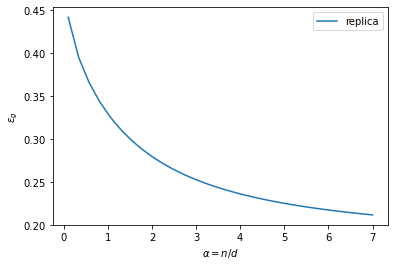

In [30]:
plt.plot(alphas,np.array(Eg), label="replica")



plt.ylabel(r"$\epsilon_g$")
plt.xlabel(r"$\alpha=n/d$")
plt.legend()
